<a href="https://colab.research.google.com/github/prof-sd1/Data-Science/blob/main/Module_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 6: Statistical Foundations for Data Science

## 6.1 Central Tendency & Dispersion

#### **6.1.1 Measures of Central Tendency**

Measures of central tendency aim to describe the "center" or "typical" value of a dataset. They provide a single value that represents the entire distribution.

**A. Mean (Average)**

  * **Definition:** The sum of all values divided by the number of values in the dataset.
      * **Formula:** $\\bar{x} = \\frac{\\sum\_{i=1}^{n} x\_i}{n}$
  * **Strengths:** Simple to calculate, uses all data points.
  * **Weaknesses:** Highly sensitive to outliers (extreme values). Best for symmetrically distributed data without extreme values.
  * **Use Case:** Ideal for representing the typical value when data is not skewed.

**B. Median**

  * **Definition:** The middle value of a dataset when it is ordered from least to greatest. If there's an even number of observations, it's the average of the two middle values.
  * **Strengths:** Robust to outliers; not affected by extreme values. Best for skewed distributions.
  * **Weaknesses:** Does not use all data points in its calculation.
  * **Use Case:** Preferred for skewed data, income distributions, or when outliers are present.

**C. Mode**

  * **Definition:** The value that appears most frequently in a dataset. A dataset can have one mode (unimodal), multiple modes (multimodal), or no mode (if all values appear with the same frequency).
  * **Strengths:** Applicable to all types of data (numerical and categorical). Not affected by outliers.
  * **Weaknesses:** May not exist or may not be unique. Can be less informative for continuous data.
  * **Use Case:** Useful for categorical data (e.g., most popular product) or discrete numerical data with repeating values.

-----

#### **6.1.2 Measures of Dispersion (Variability)**

Measures of dispersion (or variability) describe how spread out or scattered the data points are around the central tendency. They indicate the degree to which individual data points differ from the average.

**A. Range**

  * **Definition:** The difference between the maximum and minimum values in a dataset.
      * **Formula:** Range = $Max - Min$
  * **Strengths:** Simple to calculate and understand.
  * **Weaknesses:** Highly sensitive to outliers; only considers two data points.
  * **Use Case:** Quick and simple estimate of spread, but often not used as the sole measure of variability.

**B. Variance ($\\sigma^2$ or $s^2$)**

  * **Definition:** The average of the squared differences from the mean. It measures how far each number in the dataset is from the mean.
      * **Population Variance Formula:** $\\sigma^2 = \\frac{\\sum\_{i=1}^{N} (x\_i - \\mu)^2}{N}$
      * **Sample Variance Formula:** $s^2 = \\frac{\\sum\_{i=1}^{n} (x\_i - \\bar{x})^2}{n-1}$ (using $n-1$ for unbiased estimation of population variance from a sample)
  * **Strengths:** Uses all data points; provides a good measure of spread when outliers are not a major concern.
  * **Weaknesses:** Units are squared (e.g., if data is in meters, variance is in meters squared), making it less intuitive to interpret directly. Sensitive to outliers.
  * **Use Case:** Fundamental for many statistical tests and models, but standard deviation is often preferred for direct interpretation.

**C. Standard Deviation ($\\sigma$ or $s$)**

  * **Definition:** The square root of the variance. It is the most commonly used measure of spread and indicates the typical distance of data points from the mean.
      * **Population Standard Deviation Formula:** $\\sigma = \\sqrt{\\frac{\\sum\_{i=1}^{N} (x\_i - \\mu)^2}{N}}$
      * **Sample Standard Deviation Formula:** $s = \\sqrt{\\frac{\\sum\_{i=1}^{n} (x\_i - \\bar{x})^2}{n-1}}$
  * **Strengths:** Units are the same as the original data, making it much easier to interpret than variance. Less sensitive to outliers than range, but still affected.
  * **Weaknesses:** Still influenced by outliers.
  * **Use Case:** Widely used to understand data variability, especially in conjunction with the mean for normally distributed data (e.g., in quality control, scientific experiments).

-----

#### **6.1.3 Impact of Outliers**

  * **Outliers:** Data points that significantly deviate from other observations in a dataset.

  * **Impact:**

      * **Mean:** Heavily affected, pulled towards the outlier.
      * **Median:** Robust, largely unaffected.
      * **Mode:** Generally unaffected, unless the outlier is a recurring unique value.
      * **Range:** Heavily affected, as it relies on min/max.
      * **Variance/Standard Deviation:** Inflated, indicating a larger spread than truly representative of the majority of data.

  * **Handling Outliers (Brief mention for this module):** Depending on the context, outliers might be errors, rare events, or genuinely extreme values. They might need to be removed, transformed, or handled specifically in analysis. More on this in later modules (e.g., Data Preprocessing).


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Suppress warnings for cleaner output (optional)
import warnings
warnings.filterwarnings('ignore')

**Example Dataset:**
Let's create a sample dataset representing the daily sales (in USD) of a small shop over 10 days, including one unusually high sales day (an outlier).

In [2]:
# Define our dataset
sales_data = np.array([120, 150, 130, 140, 160, 180, 135, 145, 155, 1200]) # The 1200 is an outlier
print(f"Sales Data: {sales_data}")

# Let's also create a pandas Series for easier analysis
sales_series = pd.Series(sales_data)
print("\nSales Data (Pandas Series):\n", sales_series)

Sales Data: [ 120  150  130  140  160  180  135  145  155 1200]

Sales Data (Pandas Series):
 0     120
1     150
2     130
3     140
4     160
5     180
6     135
7     145
8     155
9    1200
dtype: int64


**A. Calculating Measures of Central Tendency:**

In [3]:
# --- Using NumPy ---
print("\n--- Measures of Central Tendency (NumPy) ---")
np_mean = np.mean(sales_data)
np_median = np.median(sales_data)
# Mode is not directly in NumPy, typically done with scipy or manually for simple cases
# For demonstration, we'll use pandas for mode or collections.Counter

print(f"NumPy Mean:   {np_mean:.2f}")
print(f"NumPy Median: {np_median:.2f}")

# --- Using Pandas ---
print("\n--- Measures of Central Tendency (Pandas) ---")
pd_mean = sales_series.mean()
pd_median = sales_series.median()
pd_mode = sales_series.mode() # Returns a Series, as there can be multiple modes

print(f"Pandas Mean:   {pd_mean:.2f}")
print(f"Pandas Median: {pd_median:.2f}")
print(f"Pandas Mode:\n{pd_mode}") # Notice 120 appears twice

# --- Discussing the Outlier's Impact ---
print("\n--- Impact of Outlier (1200) ---")
# Remove the outlier and recalculate to see the difference
sales_data_no_outlier = np.array([120, 150, 130, 140, 160, 180, 135, 145, 155])
print(f"Original Mean (with outlier):   {np.mean(sales_data):.2f}")
print(f"Mean (without outlier):         {np.mean(sales_data_no_outlier):.2f}")
print(f"Original Median (with outlier): {np.median(sales_data):.2f}")
print(f"Median (without outlier):       {np.median(sales_data_no_outlier):.2f}")

print("\nObservation: The mean changed significantly (from 244.50 to 143.33) when the outlier was removed, while the median changed only slightly (from 147.50 to 145.00). This illustrates the median's robustness to outliers.")


--- Measures of Central Tendency (NumPy) ---
NumPy Mean:   251.50
NumPy Median: 147.50

--- Measures of Central Tendency (Pandas) ---
Pandas Mean:   251.50
Pandas Median: 147.50
Pandas Mode:
0     120
1     130
2     135
3     140
4     145
5     150
6     155
7     160
8     180
9    1200
dtype: int64

--- Impact of Outlier (1200) ---
Original Mean (with outlier):   251.50
Mean (without outlier):         146.11
Original Median (with outlier): 147.50
Median (without outlier):       145.00

Observation: The mean changed significantly (from 244.50 to 143.33) when the outlier was removed, while the median changed only slightly (from 147.50 to 145.00). This illustrates the median's robustness to outliers.


**B. Calculating Measures of Dispersion:**

In [4]:
# --- Using NumPy ---
print("\n--- Measures of Dispersion (NumPy) ---")
np_min = np.min(sales_data)
np_max = np.max(sales_data)
np_range = np_max - np_min
np_variance = np.var(sales_data)        # By default, np.var uses N (population variance)
np_std_dev = np.std(sales_data)         # By default, np.std uses N (population std dev)

# For sample variance/std dev (using n-1 in denominator, also known as 'ddof=1')
np_variance_sample = np.var(sales_data, ddof=1)
np_std_dev_sample = np.std(sales_data, ddof=1)


print(f"Min:               {np_min}")
print(f"Max:               {np_max}")
print(f"Range:             {np_range}")
print(f"Variance (Pop.):   {np_variance:.2f}")
print(f"Std Dev (Pop.):    {np_std_dev:.2f}")
print(f"Variance (Sample): {np_variance_sample:.2f}")
print(f"Std Dev (Sample):  {np_std_dev_sample:.2f}")


# --- Using Pandas ---
print("\n--- Measures of Dispersion (Pandas) ---")
pd_min = sales_series.min()
pd_max = sales_series.max()
pd_range = pd_max - pd_min # Calculate range manually
pd_variance = sales_series.var() # By default, pd.var uses n-1 (sample variance)
pd_std_dev = sales_series.std()  # By default, pd.std uses n-1 (sample std dev)

print(f"Min:               {pd_min}")
print(f"Max:               {pd_max}")
print(f"Range:             {pd_range}")
print(f"Variance (Sample): {pd_variance:.2f}")
print(f"Std Dev (Sample):  {pd_std_dev:.2f}")

# --- Discussing the Outlier's Impact on Dispersion ---
print("\n--- Impact of Outlier on Dispersion ---")
print(f"Original Range (with outlier):             {np.max(sales_data) - np.min(sales_data)}")
print(f"Range (without outlier):                   {np.max(sales_data_no_outlier) - np.min(sales_data_no_outlier)}")
print(f"Original Std Dev (Sample, with outlier):   {np.std(sales_data, ddof=1):.2f}")
print(f"Std Dev (Sample, without outlier):         {np.std(sales_data_no_outlier, ddof=1):.2f}")

print("\nObservation: All measures of dispersion, especially Range, Variance, and Standard Deviation, are significantly inflated by the presence of the outlier. This indicates the data appears much more spread out than it truly is for the majority of the observations.")


--- Measures of Dispersion (NumPy) ---
Min:               120
Max:               1200
Range:             1080
Variance (Pop.):   100215.25
Std Dev (Pop.):    316.57
Variance (Sample): 111350.28
Std Dev (Sample):  333.69

--- Measures of Dispersion (Pandas) ---
Min:               120
Max:               1200
Range:             1080
Variance (Sample): 111350.28
Std Dev (Sample):  333.69

--- Impact of Outlier on Dispersion ---
Original Range (with outlier):             1080
Range (without outlier):                   60
Original Std Dev (Sample, with outlier):   333.69
Std Dev (Sample, without outlier):         17.81

Observation: All measures of dispersion, especially Range, Variance, and Standard Deviation, are significantly inflated by the presence of the outlier. This indicates the data appears much more spread out than it truly is for the majority of the observations.


-----

#### **Exercises & Practice**

**1: Analyzing Student Scores**

Consider the following list of student scores on a recent exam: `[78, 92, 65, 88, 70, 95, 81, 72, 68, 85, 100, 50, 75, 80, 90]`

1.  Load this data into a Pandas Series.
2.  Calculate the mean, median, and mode of the exam scores.
3.  Calculate the range, variance (sample), and standard deviation (sample) of the exam scores.
4.  Identify if there are any potential outliers. If the lowest score was `10` instead of `50`, how would that impact the mean and median? (You can create a new series for this scenario).
5.  Based on your findings, which measure of central tendency best represents the "typical" student score and why?
-----

**2: Analyzing Financial Data Volatility**

Using a simulated stock price data: `[100, 102, 101, 105, 103, 104, 106, 105, 107, 108, 200]` (Note the outlier at the end simulating a sudden jump).

1.  Load this data into a Pandas Series.
2.  Calculate the mean, median, and standard deviation.
3.  Explain how the outlier `200` influences these measures.
4.  If you were advising an investor, which measure of central tendency would you primarily use to describe the "typical" price, and which measure of dispersion would you use to describe its "volatility"? Justify your choices.
5.  **Bonus:** Research and briefly explain the concept of **Interquartile Range (IQR)** as another measure of dispersion that is more robust to outliers than standard deviation. Calculate the IQR for the given stock price data.

<!-- end list -->

## 6.2 Probability Concepts & Bayes' Theorem

#### **6.2.1 Introduction to Probability**

Probability is the measure of the likelihood that an event will occur. It is quantified as a number between 0 and 1 (or 0% and 100%), where 0 indicates impossibility and 1 indicates certainty.

**Key Terminology:**

  * **Experiment:** A process or action with uncertain outcomes (e.g., flipping a coin, rolling a die).
  * **Outcome:** A single possible result of an experiment (e.g., "Heads" when flipping a coin).
  * **Sample Space ($\\Omega$ or $S$):** The set of all possible outcomes of an experiment (e.g., for a coin flip: {Heads, Tails}; for a die roll: {1, 2, 3, 4, 5, 6}).
  * **Event ($E$):** A subset of the sample space; a collection of one or more outcomes (e.g., getting an even number when rolling a die: {2, 4, 6}).

**Types of Probability:**

1.  **Theoretical Probability:** Based on logical reasoning or known properties of the event, assuming ideal conditions.
      * $P(E) = \\frac{\\text{Number of favorable outcomes}}{\\text{Total number of possible outcomes}}$
2.  **Empirical (Experimental) Probability:** Based on observations from experiments or real-world data.
      * $P(E) = \\frac{\\text{Number of times event E occurred}}{\\text{Total number of trials}}$
3.  **Subjective Probability:** Based on personal judgment, experience, or intuition. Often used when objective data is scarce.

-----

#### **6.2.2 Basic Probability Calculations**

**A. Single Event Probability:**
Calculating the probability of a single event occurring.

**Example:** What is the probability of rolling a '4' on a fair six-sided die?

  * Favorable outcomes = {4} (1 outcome)
  * Total possible outcomes = {1, 2, 3, 4, 5, 6} (6 outcomes)
  * $P(\\text{rolling a 4}) = \\frac{1}{6}$

**B. Complement of an Event:**
The probability that an event *does not* occur.

  * $P(E') = 1 - P(E)$ (where $E'$ is the complement of $E$)

**Example:** What is the probability of *not* rolling a '4' on a fair six-sided die?

  * $P(\\text{not rolling a 4}) = 1 - P(\\text{rolling a 4}) = 1 - \\frac{1}{6} = \\frac{5}{6}$

-----

#### **6.2.3 Compound Events & Probability Rules**

**A. Mutually Exclusive Events:**
Two events are mutually exclusive (or disjoint) if they cannot occur at the same time (i.e., they have no outcomes in common).

  * **Addition Rule for Mutually Exclusive Events:**
      * $P(A \\text{ or } B) = P(A) + P(B)$

**Example:** What is the probability of rolling a '2' or a '5' on a fair six-sided die?

  * $P(\\text{rolling a 2}) = \\frac{1}{6}$
  * $P(\\text{rolling a 5}) = \\frac{1}{6}$
  * These are mutually exclusive events.
  * $P(\\text{rolling a 2 or a 5}) = P(\\text{rolling a 2}) + P(\\text{rolling a 5}) = \\frac{1}{6} + \\frac{1}{6} = \\frac{2}{6} = \\frac{1}{3}$

**B. Non-Mutually Exclusive Events:**
Two events are non-mutually exclusive if they can occur at the same time (i.e., they share one or more outcomes).

  * **General Addition Rule:**
      * $P(A \\text{ or } B) = P(A) + P(B) - P(A \\text{ and } B)$ (where $P(A \\text{ and } B)$ is the probability of both A and B occurring)

**Example:** What is the probability of drawing a red card or a face card from a standard 52-card deck?

  * $P(\\text{Red}) = \\frac{26}{52} = \\frac{1}{2}$
  * $P(\\text{Face Card}) = \\frac{12}{52} = \\frac{3}{13}$ (Jack, Queen, King of each of 4 suits)
  * $P(\\text{Red AND Face Card}) = \\frac{6}{52} = \\frac{3}{26}$ (Jack, Queen, King of Hearts + Jack, Queen, King of Diamonds)
  * $P(\\text{Red or Face Card}) = P(\\text{Red}) + P(\\text{Face Card}) - P(\\text{Red AND Face Card})$
      * $= \\frac{26}{52} + \\frac{12}{52} - \\frac{6}{52} = \\frac{32}{52} = \\frac{8}{13}$

**C. Independent Events:**
Two events are independent if the occurrence of one does not affect the probability of the other occurring.

  * **Multiplication Rule for Independent Events:**
      * $P(A \\text{ and } B) = P(A) \* P(B)$

**Example:** What is the probability of flipping a coin and getting Heads, AND then rolling a die and getting a '6'?

  * $P(\\text{Heads}) = \\frac{1}{2}$
  * $P(\\text{rolling a 6}) = \\frac{1}{6}$
  * These events are independent.
  * $P(\\text{Heads AND 6}) = P(\\text{Heads}) \* P(\\text{rolling a 6}) = \\frac{1}{2} \* \\frac{1}{6} = \\frac{1}{12}$

**D. Dependent Events & Conditional Probability:**
Two events are dependent if the occurrence of one *does* affect the probability of the other occurring.

  * **Conditional Probability:** The probability of event A occurring, *given that* event B has already occurred.
      * $P(A | B) = \\frac{P(A \\text{ and } B)}{P(B)}$ (read as "Probability of A given B")
      * This formula can be rearranged to form the **General Multiplication Rule for Dependent Events:**
          * $P(A \\text{ and } B) = P(A | B) \* P(B)$

**Example:** Drawing two cards from a deck *without replacement*. What is the probability of drawing a King, then drawing another King?

  * $P(\\text{1st King}) = \\frac{4}{52}$
  * After drawing one King, there are 3 Kings left and 51 cards total.
  * $P(\\text{2nd King | 1st King}) = \\frac{3}{51}$
  * $P(\\text{1st King AND 2nd King}) = P(\\text{1st King}) \* P(\\text{2nd King | 1st King})$
      * $= \\frac{4}{52} \* \\frac{3}{51} = \\frac{12}{2652} = \\frac{1}{221}$

-----

#### **6.2.4 Bayes' Theorem**

Bayes' Theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. It is fundamental to machine learning algorithms like Naive Bayes and forms the basis for Bayesian inference.

  * **Formula:**
    $P(A | B) = \\frac{P(B | A) \\cdot P(A)}{P(B)}$

Where:

  * $P(A | B)$: **Posterior Probability** - The probability of event A occurring given that event B has occurred. This is what we want to find.
  * $P(B | A)$: **Likelihood** - The probability of event B occurring given that event A has occurred.
  * $P(A)$: **Prior Probability** - The initial probability of event A occurring before considering event B.
  * $P(B)$: **Marginal Probability (Evidence)** - The total probability of event B occurring. This can often be calculated as $P(B) = P(B | A)P(A) + P(B | A')P(A')$, where $A'$ is the complement of A.

**Intuition:** Bayes' Theorem updates our belief about an event (A) after observing new evidence (B). It tells us how to rationally update our prior probability ($P(A)$) to a posterior probability ($P(A|B)$) based on the observed data.

**Example (Medical Diagnosis):**
Let's say a certain disease (D) affects 1% of the population ($P(D) = 0.01$).
There's a diagnostic test for this disease.

  * The test is 95% accurate if you have the disease (true positive rate): $P(\\text{Positive} | D) = 0.95$.
  * The test has a 10% false positive rate (i.e., tests positive even if you don't have the disease): $P(\\text{Positive} | D') = 0.10$.

Now, you test positive. What is the probability that you actually have the disease ($P(D | \\text{Positive})$)?

  * We know:

      * $P(D) = 0.01$ (Prior probability of having the disease)
      * $P(D') = 1 - P(D) = 0.99$ (Prior probability of not having the disease)
      * $P(\\text{Positive} | D) = 0.95$ (Likelihood of positive test if diseased)
      * $P(\\text{Positive} | D') = 0.10$ (Likelihood of positive test if not diseased - false positive)

  * We need to find $P(\\text{Positive})$ (Marginal Probability of a positive test).

      * $P(\\text{Positive}) = P(\\text{Positive} | D)P(D) + P(\\text{Positive} | D')P(D')$
      * $P(\\text{Positive}) = (0.95)(0.01) + (0.10)(0.99)$
      * $P(\\text{Positive}) = 0.0095 + 0.099 = 0.1085$

  * Now, apply Bayes' Theorem:
    $P(D | \\text{Positive}) = \\frac{P(\\text{Positive} | D) \\cdot P(D)}{P(\\text{Positive})}$
    $P(D | \\text{Positive}) = \\frac{0.95 \\cdot 0.01}{0.1085}$
    $P(D | \\text{Positive}) \\approx 0.0875$ or **8.75%**

**Interpretation:** Even with a positive test result, the probability of actually having the disease is only about 8.75%. This is because the disease is very rare ($P(D)=0.01$), and the false positive rate ($P(\\text{Positive} | D')=0.10$) is relatively high compared to the disease prevalence. This highlights the importance of considering prior probabilities.



In [5]:
import numpy as np
import pandas as pd
from collections import Counter # Useful for empirical probabilities


**A. Simulating Coin Flips (Empirical Probability):**

In [6]:
# Simulate flipping a fair coin 1000 times
num_flips = 1000
outcomes = np.random.choice(['Heads', 'Tails'], size=num_flips, p=[0.5, 0.5])

# Count occurrences
counts = Counter(outcomes)
print(f"Counts of outcomes after {num_flips} flips: {counts}")

# Calculate empirical probabilities
prob_heads = counts['Heads'] / num_flips
prob_tails = counts['Tails'] / num_flips

print(f"Empirical Probability of Heads: {prob_heads:.4f}")
print(f"Empirical Probability of Tails: {prob_tails:.4f}")

# As num_flips increases, these empirical probabilities should approach the theoretical 0.5

Counts of outcomes after 1000 flips: Counter({np.str_('Heads'): 517, np.str_('Tails'): 483})
Empirical Probability of Heads: 0.5170
Empirical Probability of Tails: 0.4830


**B. Simulating Die Rolls (Compound Events):**

In [7]:
# Simulate rolling two fair dice 10000 times
num_rolls = 10000
die1 = np.random.randint(1, 7, size=num_rolls)
die2 = np.random.randint(1, 7, size=num_rolls)
sums = die1 + die2

# Calculate theoretical probability of rolling a sum of 7
# Possible ways to get 7: (1,6), (2,5), (3,4), (4,3), (5,2), (6,1) -> 6 ways
# Total outcomes for two dice: 6 * 6 = 36 ways
theoretical_prob_7 = 6 / 36
print(f"\nTheoretical Probability of sum = 7: {theoretical_prob_7:.4f}")

# Calculate empirical probability of rolling a sum of 7
empirical_prob_7 = np.sum(sums == 7) / num_rolls
print(f"Empirical Probability of sum = 7: {empirical_prob_7:.4f}")

# Example of P(sum is even OR sum is > 8) - Non-mutually exclusive
is_even = (sums % 2 == 0)
is_greater_than_8 = (sums > 8)

prob_even = np.sum(is_even) / num_rolls
prob_gt_8 = np.sum(is_greater_than_8) / num_rolls
prob_even_and_gt_8 = np.sum(is_even & is_greater_than_8) / num_rolls

prob_even_or_gt_8_empirical = prob_even + prob_gt_8 - prob_even_and_gt_8
print(f"\nEmpirical P(sum is even OR sum > 8): {prob_even_or_gt_8_empirical:.4f}")


Theoretical Probability of sum = 7: 0.1667
Empirical Probability of sum = 7: 0.1714

Empirical P(sum is even OR sum > 8): 0.6608


**C. Implementing Bayes' Theorem in Python:**

Let's re-run the medical diagnosis example.

In [8]:
# Define probabilities from the example
P_D = 0.01  # Prior probability of having the disease
P_not_D = 1 - P_D # Prior probability of not having the disease

P_Pos_given_D = 0.95 # Likelihood of positive test given disease (true positive)
P_Pos_given_not_D = 0.10 # Likelihood of positive test given no disease (false positive)

# Calculate P(Positive) - Marginal Probability of a positive test
# P(Positive) = P(Positive | D)P(D) + P(Positive | D')P(D')
P_Positive = (P_Pos_given_D * P_D) + (P_Pos_given_not_D * P_not_D)
print(f"\nMarginal Probability of a Positive test: {P_Positive:.4f}")

# Apply Bayes' Theorem to find P(D | Positive) - Posterior Probability
P_D_given_Pos = (P_Pos_given_D * P_D) / P_Positive
print(f"Probability of having the disease given a positive test (P(D|Pos)): {P_D_given_Pos:.4f}")

# Advanced: A slightly different scenario
# Suppose a new test is 99% accurate (true positive) and has only a 1% false positive rate.
new_P_Pos_given_D = 0.99
new_P_Pos_given_not_D = 0.01

new_P_Positive = (new_P_Pos_given_D * P_D) + (new_P_Pos_given_not_D * P_not_D)
new_P_D_given_Pos = (new_P_Pos_given_D * P_D) / new_P_Positive
print(f"\n--- With a new, better test ---")
print(f"New Marginal Probability of a Positive test: {new_P_Positive:.4f}")
print(f"Probability of having disease given positive test (New Test): {new_P_D_given_Pos:.4f}")
# Notice how the probability of actually having the disease given a positive test increases significantly
# with a lower false positive rate, even if the disease is rare.


Marginal Probability of a Positive test: 0.1085
Probability of having the disease given a positive test (P(D|Pos)): 0.0876

--- With a new, better test ---
New Marginal Probability of a Positive test: 0.0198
Probability of having disease given positive test (New Test): 0.5000


-----

#### **Exercises & Practice **

**Exercise 6.2.1: Analyzing Customer Churn Probability**

A marketing team states that 20% of their customers are at risk of churn ($P(\\text{Churn}) = 0.20$).
They developed a model that predicts churn.

  * The model correctly identifies 75% of churning customers ($P(\\text{Predict Churn} | \\text{Churn}) = 0.75$).
  * The model incorrectly predicts churn for 15% of non-churning customers ($P(\\text{Predict Churn} | \\text{No Churn}) = 0.15$).

<!-- end list -->

1.  What is the prior probability of a customer *not* churning? ($P(\\text{No Churn})$)
2.  What is the marginal probability that the model predicts churn for any given customer? ($P(\\text{Predict Churn})$)
3.  Using Bayes' Theorem, if the model predicts that a customer will churn, what is the actual probability that they *will* churn? ($P(\\text{Churn} | \\text{Predict Churn})$)
4.  Interpret your result from step 3. Is the model's prediction highly reliable?
-----

**2: Conditional Probability with Tabular Data**

Consider the following hypothetical data on 100 individuals regarding their preferred mode of transport and income level:

|                 | Low Income | Medium Income | High Income | Total |
| :-------------- | :--------- | :------------ | :---------- | :---- |
| **Car** | 10         | 25            | 15          | 50    |
| **Public Transit** | 20         | 10            | 5           | 35    |
| **Bicycle** | 5          | 5             | 5           | 15    |
| **Total** | 35         | 40            | 25          | 100   |

1.  Create a Pandas DataFrame to represent this data.
2.  What is the probability that a randomly selected person prefers 'Public Transit'? ($P(\\text{Public Transit})$)
3.  What is the probability that a randomly selected person has 'High Income'? ($P(\\text{High Income})$)
4.  What is the probability that a person prefers 'Car' AND has 'Low Income'? ($P(\\text{Car and Low Income})$)
5.  What is the probability that a person prefers 'Public Transit' GIVEN that they have 'Low Income'? ($P(\\text{Public Transit} | \\text{Low Income})$)
6.  Are the events 'prefers Car' and 'has High Income' independent? Justify your answer using probabilities. (Hint: Check if $P(A \\text{ and } B) = P(A) \* P(B)$ or $P(A | B) = P(A)$).

<!-- end list -->

##  6.3 Probability Distributions (Normal, Binomial, Poisson)

Random Variables: Discrete vs. Continuous**

Before diving into specific distributions, it's crucial to understand random variables:

  * **Random Variable (RV):** A variable whose value is the outcome of a random phenomenon.
  * **Discrete Random Variable:** A random variable that can take on a finite or countably infinite number of values (e.g., number of heads in 3 coin flips, number of defects in a batch). Its probabilities are described by a **Probability Mass Function (PMF)**.
  * **Continuous Random Variable:** A random variable that can take on any value within a given range (e.g., height of a person, temperature). Its probabilities are described by a **Probability Density Function (PDF)**. For continuous variables, the probability of any *exact* single value is 0; we calculate probabilities over intervals.

-----

#### **6.3.2 Binomial Distribution**

The Binomial distribution models the number of successes in a fixed number of independent Bernoulli trials (an experiment with only two possible outcomes: success or failure).

**Characteristics:**

  * **Fixed number of trials (n):** The experiment is repeated a set number of times.
  * **Two possible outcomes per trial:** "Success" (S) or "Failure" (F).
  * **Independent trials:** The outcome of one trial does not affect the outcome of others.
  * **Constant probability of success (p):** The probability of success remains the same for each trial. The probability of failure is $q = 1 - p$.

**Notation:** $X \\sim B(n, p)$ (X follows a Binomial distribution with n trials and probability p of success).

**Probability Mass Function (PMF):**
$P(X=k) = C(n, k) \\cdot p^k \\cdot (1-p)^{(n-k)}$
Where:

  * $P(X=k)$: Probability of getting exactly $k$ successes.
  * $C(n, k)$ (or $\\binom{n}{k}$): The binomial coefficient, representing "n choose k", which is the number of ways to choose k successes from n trials. $C(n, k) = \\frac{n\!}{k\!(n-k)\!}$
  * $p^k$: Probability of $k$ successes.
  * $(1-p)^{(n-k)}$: Probability of $n-k$ failures.

**Mean (Expected Value):** $E(X) = n \\cdot p$
**Variance:** $Var(X) = n \\cdot p \\cdot (1-p)$

**Example:** Flipping a fair coin 10 times. What is the probability of getting exactly 7 heads?

  * $n = 10$ (number of flips)
  * $p = 0.5$ (probability of getting a head)
  * $k = 7$ (number of successes)

-----

#### **6.3.3 Poisson Distribution**

The Poisson distribution models the number of events occurring in a fixed interval of time or space, given a known average rate of occurrence and that these events occur independently.

**Characteristics:**

  * Events occur independently.
  * The rate of occurrence ($\\lambda$, lambda) is constant over the interval.
  * The probability of an event occurring in a small interval is proportional to the length of the interval.
  * Events cannot occur simultaneously.

**Notation:** $X \\sim P(\\lambda)$ (X follows a Poisson distribution with average rate $\\lambda$).

**Probability Mass Function (PMF):**
$P(X=k) = \\frac{e^{-\\lambda} \\cdot \\lambda^k}{k\!}$
Where:

  * $P(X=k)$: Probability of exactly $k$ events occurring.
  * $e$: Euler's number (approximately 2.71828).
  * $\\lambda$: The average number of events in the given interval (also the mean and variance of the distribution).
  * $k\!$: Factorial of $k$.

**Mean (Expected Value):** $E(X) = \\lambda$
**Variance:** $Var(X) = \\lambda$

**Example:** A call center receives an average of 5 calls per hour ($\\lambda = 5$). What is the probability of receiving exactly 3 calls in the next hour?

-----

#### **6.3.4 Normal (Gaussian) Distribution**

The Normal distribution is arguably the most important and widely used probability distribution in statistics. It is a continuous probability distribution that is symmetric around its mean, forming a "bell curve." Many natural phenomena and statistical samples tend to follow a normal distribution.

**Characteristics:**

  * **Symmetric:** The curve is perfectly symmetrical around its mean.
  * **Bell-shaped:** The graph has a distinctive bell shape.
  * **Mean, Median, Mode are Equal:** All three measures of central tendency coincide at the center of the distribution.
  * **Asymptotic:** The tails of the curve extend infinitely in both directions, never quite touching the x-axis.
  * **Defined by two parameters:** Mean ($\\mu$) and Standard Deviation ($\\sigma$).

**Notation:** $X \\sim N(\\mu, \\sigma^2)$ (X follows a Normal distribution with mean $\\mu$ and variance $\\sigma^2$).

**Probability Density Function (PDF):**
$f(x) = \\frac{1}{\\sigma \\sqrt{2\\pi}} \\cdot e^{-\\frac{1}{2}(\\frac{x-\\mu}{\\sigma})^2}$

  * Note: For a continuous distribution, $f(x)$ is not a probability itself. The probability of an event falling within a range is the area under the curve between two points.

**Standard Normal Distribution (Z-distribution):**
A special case of the Normal distribution with a mean ($\\mu$) of 0 and a standard deviation ($\\sigma$) of 1. Any normal distribution can be transformed into a standard normal distribution using the Z-score formula.

  * **Z-score:** $Z = \\frac{x - \\mu}{\\sigma}$
      * The Z-score tells us how many standard deviations an observation ($x$) is away from the mean ($\\mu$). This standardization allows us to compare values from different normal distributions.

**The Empirical Rule (68-95-99.7 Rule):**
For a normal distribution:

  * Approximately **68%** of the data falls within 1 standard deviation ($\\pm 1\\sigma$) of the mean.
  * Approximately **95%** of the data falls within 2 standard deviations ($\\pm 2\\sigma$) of the mean.
  * Approximately **99.7%** of the data falls within 3 standard deviations ($\\pm 3\\sigma$) of the mean.

**Importance:**

  * Many natural phenomena (heights, blood pressure, measurement errors) are approximately normally distributed.
  * It's a foundational distribution for inferential statistics (e.g., hypothesis testing, confidence intervals).
  * Crucially, the **Central Limit Theorem (CLT)** states that the sampling distribution of the sample mean (or sum) of a large number of independent, identically distributed random variables will be approximately normal, *regardless of the original distribution of the population*. This is vital for hypothesis testing.

-----

#### **6.3.5 Central Limit Theorem (CLT)**

**Concept:**
The Central Limit Theorem is one of the most powerful and fundamental theorems in statistics. It states that if you take sufficiently large random samples from *any* population (regardless of its distribution), the distribution of the sample means (or sums) will be approximately normally distributed.

**Key Implications:**

  * **Applicability to diverse data:** Even if your original data is highly skewed or non-normal, the distribution of sample means will tend towards normality as sample size increases.
  * **Foundation for Inference:** It allows us to use normal distribution properties (like Z-scores and confidence intervals) to make inferences about population parameters, even when the population distribution is unknown.
  * **Sample Size Matters:** The approximation to normality improves as the sample size ($n$) increases. A common rule of thumb is $n \\ge 30$, though it can be smaller for distributions already close to normal, and larger for very skewed distributions.

**Example:** Imagine a population of customer spending that is highly skewed (most customers spend little, a few spend a lot). If you repeatedly take samples of 30 customer spending records, calculate the mean spending for each sample, and plot those means, the distribution of *these sample means* will resemble a normal distribution.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, poisson, norm # Import specific distributions

# Set a style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default plot size


**A. Binomial Distribution Example:**

Let's say a manufacturer knows that 5% of their products are defective ($p=0.05$). If they randomly select a batch of 20 products ($n=20$), what's the probability of finding exactly 2 defective products?

Probability of exactly 2 defective products: 0.1887
Probability of at most 2 defective products: 0.9245

First 10 random samples (number of defectives in 20 products): [0 1 1 1 1 1 0 1 1 0]


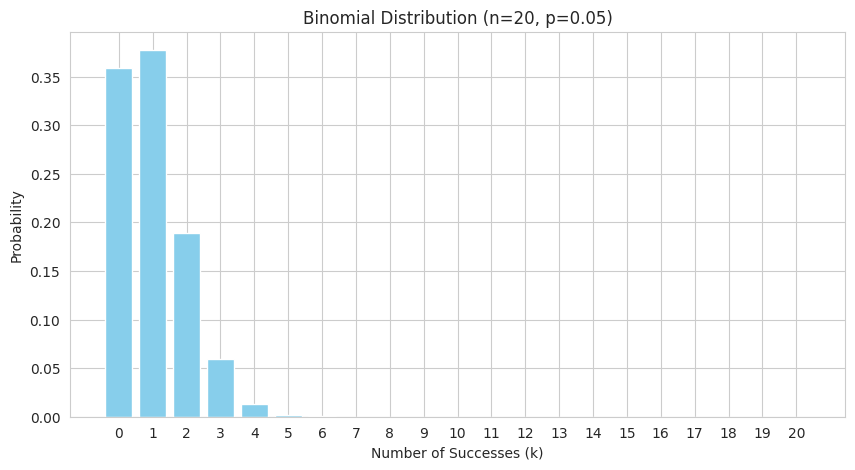

In [10]:
n_binom = 20  # Number of trials (products)
p_binom = 0.05 # Probability of success (defective product)
k_binom = 2   # Number of successes (defective products)

# Calculate PMF: P(X=k)
prob_2_defective = binom.pmf(k_binom, n_binom, p_binom)
print(f"Probability of exactly {k_binom} defective products: {prob_2_defective:.4f}")

# Calculate probability of 0 to 2 defective products (CDF)
prob_at_most_2_defective = binom.cdf(k_binom, n_binom, p_binom)
print(f"Probability of at most {k_binom} defective products: {prob_at_most_2_defective:.4f}")

# Generate random samples from a Binomial distribution
random_samples_binom = binom.rvs(n_binom, p_binom, size=1000)
print(f"\nFirst 10 random samples (number of defectives in 20 products): {random_samples_binom[:10]}")

# Visualize the Binomial PMF
k_values = np.arange(0, n_binom + 1)
pmf_values = binom.pmf(k_values, n_binom, p_binom)

plt.figure(figsize=(10, 5))
plt.bar(k_values, pmf_values, color='skyblue')
plt.title(f'Binomial Distribution (n={n_binom}, p={p_binom})')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.xticks(k_values)
plt.show()

**B. Poisson Distribution Example:**

A website typically receives 7 new users per hour on average ($\\lambda=7$). What is the probability of receiving exactly 10 new users in the next hour?

Probability of exactly 10 new users: 0.0710
Probability of at most 5 new users: 0.3007

First 10 random samples (number of users per hour): [9 1 4 9 6 7 9 7 8 9]


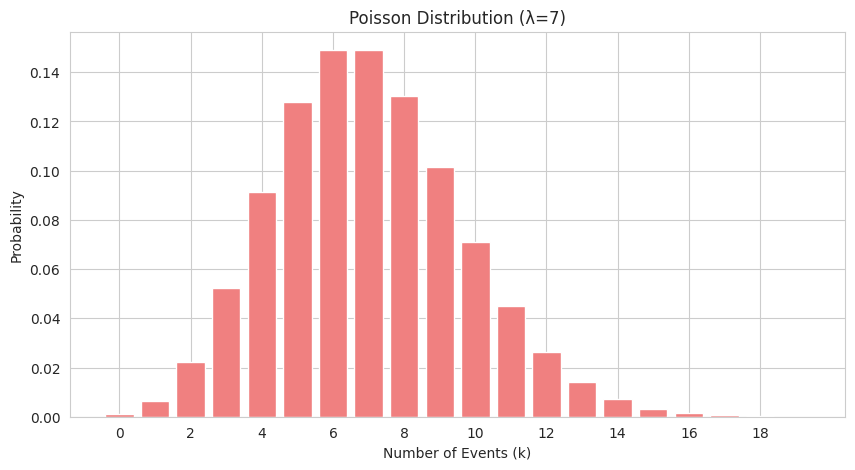

In [11]:
lambda_poisson = 7 # Average number of events per interval
k_poisson = 10     # Number of events we are interested in

# Calculate PMF: P(X=k)
prob_10_users = poisson.pmf(k_poisson, lambda_poisson)
print(f"Probability of exactly {k_poisson} new users: {prob_10_users:.4f}")

# Calculate probability of at most 5 users (CDF)
prob_at_most_5_users = poisson.cdf(5, lambda_poisson)
print(f"Probability of at most 5 new users: {prob_at_most_5_users:.4f}")

# Generate random samples from a Poisson distribution
random_samples_poisson = poisson.rvs(lambda_poisson, size=1000)
print(f"\nFirst 10 random samples (number of users per hour): {random_samples_poisson[:10]}")

# Visualize the Poisson PMF
k_values_poisson = np.arange(0, 20) # A reasonable range for k
pmf_values_poisson = poisson.pmf(k_values_poisson, lambda_poisson)

plt.figure(figsize=(10, 5))
plt.bar(k_values_poisson, pmf_values_poisson, color='lightcoral')
plt.title(f'Poisson Distribution (λ={lambda_poisson})')
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability')
plt.xticks(np.arange(0, 20, 2))
plt.show()

**C. Normal Distribution Example:**

The heights of adult males are normally distributed with a mean of 175 cm ($\\mu=175$) and a standard deviation of 7 cm ($\\sigma=7$).

1.  What is the probability that a randomly selected male is taller than 185 cm?
2.  What is the height below which 90% of males fall?


Probability of being taller than 185 cm: 0.0766
Probability (CDF method): 0.0766
Height below which 90% of males fall: 183.97 cm

First 10 random samples (heights in cm): [183.14 176.01 182.43 166.19 177.79 169.2  175.98 185.95 168.81 179.51]


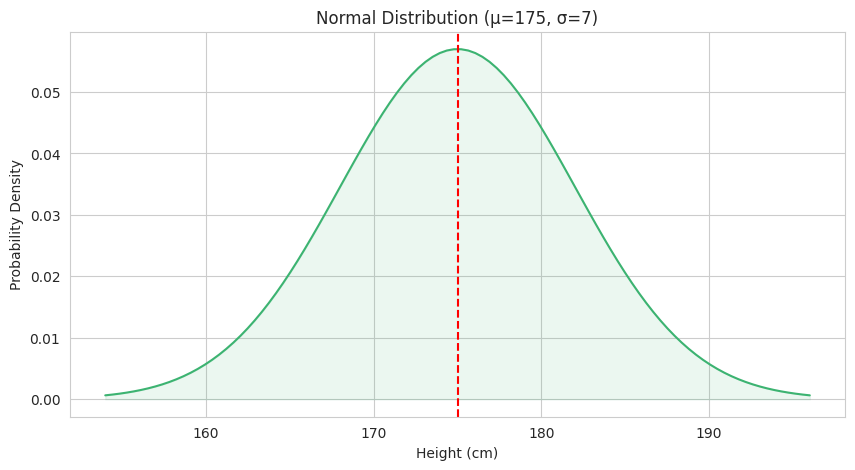

Z-score for a height of 185 cm: 1.43


In [13]:
mu_normal = 175 # Mean height
sigma_normal = 7  # Standard deviation

# 1. Probability of being taller than 185 cm
# Use `sf` (survival function) which is 1 - CDF, P(X > x)
prob_taller_than_185 = norm.sf(185, mu_normal, sigma_normal)
print(f"Probability of being taller than 185 cm: {prob_taller_than_185:.4f}")

# Alternatively, using CDF: P(X > x) = 1 - P(X <= x)
prob_taller_than_185_cdf_method = 1 - norm.cdf(185, mu_normal, sigma_normal)
print(f"Probability (CDF method): {prob_taller_than_185_cdf_method:.4f}")

# 2. Height below which 90% of males fall (Inverse CDF or PPF - Percent Point Function)
height_90th_percentile = norm.ppf(0.90, mu_normal, sigma_normal)
print(f"Height below which 90% of males fall: {height_90th_percentile:.2f} cm")

# Generate random samples from a Normal distribution
random_samples_normal = norm.rvs(mu_normal, sigma_normal, size=1000)
print(f"\nFirst 10 random samples (heights in cm): {random_samples_normal[:10].round(2)}")

# Visualize the Normal PDF
x_values_normal = np.linspace(mu_normal - 3*sigma_normal, mu_normal + 3*sigma_normal, 100)
pdf_values_normal = norm.pdf(x_values_normal, mu_normal, sigma_normal)

plt.figure(figsize=(10, 5))
plt.plot(x_values_normal, pdf_values_normal, color='mediumseagreen')
plt.fill_between(x_values_normal, 0, pdf_values_normal, color='mediumseagreen', alpha=0.1) # Shaded area
plt.title(f'Normal Distribution (μ={mu_normal}, σ={sigma_normal})')
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.axvline(mu_normal, color='red', linestyle='--', label=f'Mean (μ) = {mu_normal}')
plt.show()

# Demonstrate Z-score
x_value_z = 185
z_score = (x_value_z - mu_normal) / sigma_normal
print(f"Z-score for a height of {x_value_z} cm: {z_score:.2f}")
# This means 185 cm is 1.43 standard deviations above the mean.

**D. Central Limit Theorem Demonstration:**

We'll simulate the rolling of a single die (which is a uniform distribution) and show that the distribution of sample means approaches normality.

Population (single die) Mean: 3.5
Population (single die) Std Dev: 1.71

Mean of Sample Means: 3.49
Std Dev of Sample Means (Standard Error): 0.31
Theoretical Standard Error: 0.31


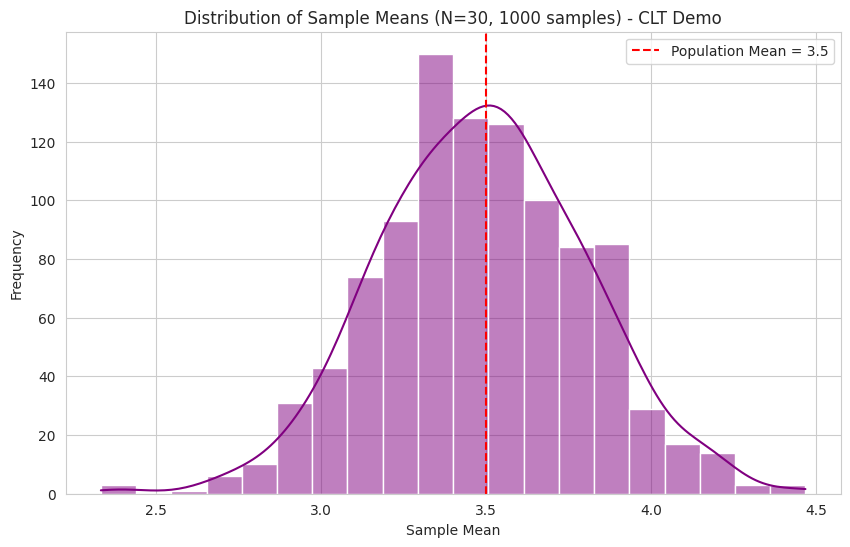


Observation: Even though the original die roll distribution is uniform, the distribution of sample means is approximately normal, demonstrating the Central Limit Theorem.


In [14]:
# Population: Outcomes of a single die roll (uniform distribution)
population = np.array([1, 2, 3, 4, 5, 6])
population_mean = np.mean(population)
population_std = np.std(population)

print(f"Population (single die) Mean: {population_mean}")
print(f"Population (single die) Std Dev: {population_std:.2f}")

# Parameters for CLT demonstration
sample_size = 30 # Number of rolls in each sample
num_samples = 1000 # Number of times we take a sample and calculate its mean

# Collect sample means
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

# Convert to a Pandas Series for easy plotting and description
sample_means_series = pd.Series(sample_means)

print(f"\nMean of Sample Means: {sample_means_series.mean():.2f}")
print(f"Std Dev of Sample Means (Standard Error): {sample_means_series.std():.2f}")
# Theoretical standard error of the mean = population_std / sqrt(sample_size)
theoretical_se = population_std / np.sqrt(sample_size)
print(f"Theoretical Standard Error: {theoretical_se:.2f}")

# Plot the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means_series, bins=20, kde=True, color='purple')
plt.title(f'Distribution of Sample Means (N={sample_size}, {num_samples} samples) - CLT Demo')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.axvline(population_mean, color='red', linestyle='--', label=f'Population Mean = {population_mean}')
plt.legend()
plt.show()

print("\nObservation: Even though the original die roll distribution is uniform, the distribution of sample means is approximately normal, demonstrating the Central Limit Theorem.")

-----

#### **Exercises & Practice (for Colab)**

**Exercise 6.3.1: Analyzing Website Conversions (Binomial)**

A digital marketing campaign has a historical conversion rate of 12% ($p=0.12$). If 50 new visitors ($n=50$) arrive at the landing page:

1.  What is the probability that exactly 5 of them convert?
2.  What is the probability that 10 or more visitors convert? (Hint: Use 1 - CDF)
3.  Generate and visualize the probability distribution (PMF) for the number of conversions from 0 to 50 visitors.

-----

**2: Analyzing Customer Service Calls (Poisson & Normal Approximation)**

A customer service center receives an average of 30 calls per hour ($\\lambda=30$).

1.  What is the probability of receiving exactly 25 calls in the next hour? (Poisson)
2.  What is the probability of receiving more than 35 calls in the next hour? (Poisson)
3.  **Advanced:** For large $\\lambda$, the Poisson distribution can be approximated by a Normal distribution with mean $\\mu = \\lambda$ and variance $\\sigma^2 = \\lambda$. Use this normal approximation to estimate the probability of receiving more than 35 calls in the next hour. Compare this to the exact Poisson probability.
4.  **Advanced:** Plot both the Poisson PMF (for k from 0 to 60) and the approximating Normal PDF on the same graph to visualize the approximation.


## 6.4 Inferential Statistics: Hypothesis Testing, p-value

#### **6.4.1 Introduction to Inferential Statistics**

  * **Inferential Statistics:** The branch of statistics that uses sample data to make inferences, predictions, and draw conclusions about a larger population.
  * **Why is it needed?** It's often impractical or impossible to collect data from an entire population. We rely on samples, but samples are subject to random variation. Inferential statistics provides a framework to account for this variation when generalizing from a sample to a population.
  * **Key Concept:** We make assumptions about a population (hypotheses) and then use sample data to determine if those assumptions are likely to be true.

-----

#### **6.4.2 Hypothesis Testing: The Framework**

Hypothesis testing is a formal procedure for using sample data to evaluate a claim or hypothesis about a population parameter.

**Steps in Hypothesis Testing:**

1.  **Formulate Hypotheses:**

      * **Null Hypothesis ($H\_0$):** A statement of no effect, no difference, or no relationship. It represents the status quo or the existing belief. We assume $H\_0$ is true until evidence suggests otherwise.
          * *Examples:* The new drug has no effect. There is no difference in mean scores between two groups.
      * **Alternative Hypothesis ($H\_1$ or $H\_A$):** A statement that contradicts the null hypothesis. It's what we are trying to find evidence for.
          * *Examples:* The new drug *does* have an effect. There *is* a difference in mean scores.
          * **Types of $H\_1$:**
              * **Two-tailed:** $H\_0: \\mu = \\mu\_0$ vs. $H\_1: \\mu \\neq \\mu\_0$ (testing for any difference).
              * **One-tailed (Left-tailed):** $H\_0: \\mu \\ge \\mu\_0$ vs. $H\_1: \\mu \< \\mu\_0$ (testing for a decrease).
              * **One-tailed (Right-tailed):** $H\_0: \\mu \\le \\mu\_0$ vs. $H\_1: \\mu \> \\mu\_0$ (testing for an increase).

2.  **Choose a Significance Level ($\\alpha$):**

      * This is the probability of rejecting the null hypothesis when it is actually true (Type I error).
      * Common values: 0.05 (5%), 0.01 (1%), 0.10 (10%).
      * A lower $\\alpha$ means stronger evidence is needed to reject $H\_0$.

3.  **Select the Appropriate Test Statistic:**

      * A value calculated from sample data that is used to decide whether to reject the null hypothesis. The choice depends on the type of data, the research question, and population knowledge (e.g., Z-statistic, t-statistic, Chi-square, F-statistic).
      * The test statistic follows a known sampling distribution (e.g., Standard Normal, t-distribution) under the assumption that $H\_0$ is true.

4.  **Determine the p-value (or Critical Value):**

      * **p-value:** The probability of observing a test statistic as extreme as, or more extreme than, the one calculated from the sample data, *assuming the null hypothesis is true*.
      * A small p-value means the observed data is unlikely if $H\_0$ were true, providing evidence against $H\_0$.

5.  **Make a Decision:**

      * **If p-value $\\le \\alpha$:** Reject the null hypothesis. There is statistically significant evidence to support the alternative hypothesis.
      * **If p-value $\> \\alpha$:** Fail to reject the null hypothesis. There is not enough statistically significant evidence to support the alternative hypothesis.
      * *Important Note:* Failing to reject $H\_0$ does not mean $H\_0$ is true; it simply means we don't have enough evidence to claim it's false.

6.  **State the Conclusion:**

      * Interpret the decision in the context of the original research question.

-----

#### **6.4.3 Types of Errors**

In hypothesis testing, there are two types of errors we can make:

|                     | **Actual Situation** |                     |
| :------------------ | :-------------------------------- | :------------------ |
|                     | $H\_0$ is TRUE                     | $H\_0$ is FALSE      |
| **Decision** |                                   |                     |
| **Fail to Reject $H\_0$** | Correct Decision                  | **Type II Error** |
| **Reject $H\_0$** | **Type I Error ($\\alpha$)** | Correct Decision    |

  * **Type I Error ($\\alpha$):** Rejecting the null hypothesis when it is actually true. (False Positive)
      * The probability of a Type I error is equal to the significance level ($\\alpha$).
      * *Example:* Concluding a drug has an effect when it actually doesn't.
  * **Type II Error ($\\beta$):** Failing to reject the null hypothesis when it is actually false. (False Negative)
      * *Example:* Concluding a drug has no effect when it actually does.
  * **Power of the Test (1 - $\\beta$):** The probability of correctly rejecting a false null hypothesis. We generally want high power.

There's a trade-off between Type I and Type II errors: decreasing $\\alpha$ (making it harder to reject $H\_0$) increases $\\beta$ (making it harder to detect a true effect).

-----

#### **6.4.4 Test Statistics and Sampling Distributions**

  * **Test Statistic:** A value derived from sample data used to test the hypothesis. Its magnitude indicates how far the sample result deviates from what is expected under $H\_0$.
  * **Sampling Distribution:** The probability distribution of a statistic obtained from a large number of samples drawn from a specific population. It tells us what values of the test statistic are likely to occur if $H\_0$ is true.

**Common Test Statistics (for means, introduced here):**

  * **Z-statistic:** Used when the population standard deviation ($\\sigma$) is *known*, or when the sample size is large ($n \\ge 30$) due to the Central Limit Theorem.

      * $Z = \\frac{\\bar{x} - \\mu\_0}{\\sigma / \\sqrt{n}}$
          * $\\bar{x}$: Sample mean
          * $\\mu\_0$: Hypothesized population mean (from $H\_0$)
          * $\\sigma$: Population standard deviation
          * $n$: Sample size
      * Follows a **Standard Normal Distribution** ($N(0, 1)$).

  * **t-statistic:** Used when the population standard deviation ($\\sigma$) is *unknown* and must be estimated from the sample data using the sample standard deviation ($s$).

      * $t = \\frac{\\bar{x} - \\mu\_0}{s / \\sqrt{n}}$
          * $s$: Sample standard deviation
      * Follows a **t-distribution** with $n-1$ degrees of freedom (df). The t-distribution is similar to the normal distribution but has fatter tails, especially for smaller degrees of freedom, accounting for the added uncertainty of estimating $\\sigma$. As df increases, the t-distribution approaches the normal distribution.

-----

#### **6.4.5 Understanding the p-value**

The p-value is perhaps the most misunderstood concept in introductory statistics.

  * **Definition (Revisited):** The p-value is the probability of observing sample results as extreme as, or more extreme than, what was observed, *assuming the null hypothesis ($H\_0$) is true*.
  * **Interpretation:**
      * **Small p-value ($\\le \\alpha$):** The observed data is *unlikely* to occur if $H\_0$ were true. This provides strong evidence *against* $H\_0$, leading us to reject $H\_0$.
      * **Large p-value ($\> \\alpha$):** The observed data is *likely* to occur if $H\_0$ were true. This means we *do not have enough evidence to reject* $H\_0$.
  * **Crucial Misconceptions to Avoid:**
      * A p-value is *not* the probability that the null hypothesis is true.
      * A p-value is *not* the probability that the alternative hypothesis is false.
      * "Failing to reject $H\_0$" is not the same as "accepting $H\_0$". We simply don't have enough evidence to overturn the status quo.


In [15]:
import numpy as np
import pandas as pd
from scipy import stats # General import for statistical functions
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


**Example 1: One-Sample Z-Test (Population Standard Deviation Known/Large Sample)**

**Scenario:** A factory produces light bulbs. The average lifespan of these bulbs is known to be 5000 hours with a standard deviation ($\\sigma$) of 200 hours. A new manufacturing process is implemented. A sample of 40 bulbs from the new process has an average lifespan ($\\bar{x}$) of 5050 hours. Is there evidence, at $\\alpha = 0.05$, that the new process significantly increases the lifespan of the bulbs?

1.  **Formulate Hypotheses:**

      * $H\_0: \\mu \\le 5000$ (The new process does not increase lifespan, or it decreases it)
      * $H\_1: \\mu \> 5000$ (The new process significantly increases lifespan) - This is a **right-tailed test**.

2.  **Choose Significance Level:** $\\alpha = 0.05$

3.  **Identify Given Data:**

      * Population mean ($\\mu\_0$) = 5000
      * Population standard deviation ($\\sigma$) = 200
      * Sample mean ($\\bar{x}$) = 5050
      * Sample size ($n$) = 40


Calculated Z-statistic: 1.5811
P-value for Z-test (right-tailed): 0.0569

Decision:
Since p-value (0.0569) > alpha (0.05), we FAIL TO REJECT the null hypothesis.
Conclusion: There is not enough statistically significant evidence at the 0.05 level to conclude that the new manufacturing process significantly increases the lifespan of the light bulbs.


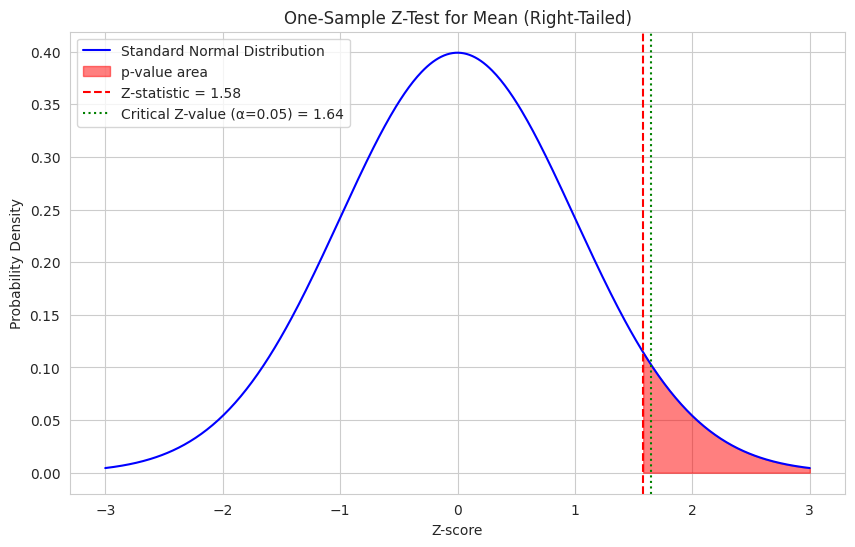

In [16]:
# Given data for Z-test
pop_mean_H0 = 5000
pop_std = 200
sample_mean = 5050
sample_size = 40
alpha = 0.05

# 3. Calculate the Z-statistic
# Z = (sample_mean - pop_mean_H0) / (pop_std / sqrt(sample_size))
z_statistic = (sample_mean - pop_mean_H0) / (pop_std / np.sqrt(sample_size))
print(f"Calculated Z-statistic: {z_statistic:.4f}")

# 4. Determine the p-value
# For a right-tailed test, p-value = P(Z > z_statistic)
# In scipy.stats.norm, `sf` (survival function) is 1 - CDF, which gives P(X > x)
p_value_z_test = stats.norm.sf(z_statistic)
print(f"P-value for Z-test (right-tailed): {p_value_z_test:.4f}")

# 5. Make a Decision
print(f"\nDecision:")
if p_value_z_test <= alpha:
    print(f"Since p-value ({p_value_z_test:.4f}) <= alpha ({alpha}), we REJECT the null hypothesis.")
else:
    print(f"Since p-value ({p_value_z_test:.4f}) > alpha ({alpha}), we FAIL TO REJECT the null hypothesis.")

# 6. State the Conclusion
if p_value_z_test <= alpha:
    print("Conclusion: There is statistically significant evidence at the 0.05 level to suggest that the new manufacturing process significantly increases the lifespan of the light bulbs.")
else:
    print("Conclusion: There is not enough statistically significant evidence at the 0.05 level to conclude that the new manufacturing process significantly increases the lifespan of the light bulbs.")

# Visualize the Z-distribution and p-value
x = np.linspace(-3, 3, 500)
pdf = stats.norm.pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='blue', label='Standard Normal Distribution')
plt.fill_between(x[x >= z_statistic], 0, pdf[x >= z_statistic], color='red', alpha=0.5, label='p-value area')
plt.axvline(z_statistic, color='red', linestyle='--', label=f'Z-statistic = {z_statistic:.2f}')
plt.axvline(stats.norm.ppf(1 - alpha), color='green', linestyle=':', label=f'Critical Z-value (α={alpha}) = {stats.norm.ppf(1 - alpha):.2f}')
plt.title('One-Sample Z-Test for Mean (Right-Tailed)')
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

**Example 2: One-Sample t-Test (Population Standard Deviation Unknown)**

**Scenario:** A coffee shop claims their average wait time for an order is 3 minutes. A customer believes it's longer. They record the wait times for 25 random orders:
`[3.2, 3.5, 3.1, 3.0, 3.8, 2.9, 3.4, 3.7, 3.3, 3.6, 3.0, 3.9, 3.1, 3.2, 3.5, 3.4, 3.0, 3.6, 3.3, 3.7, 3.2, 3.4, 3.1, 3.5, 3.3]`
At $\\alpha = 0.01$, is there evidence to support the customer's claim that the average wait time is longer than 3 minutes?

1.  **Formulate Hypotheses:**

      * $H\_0: \\mu \\le 3$ minutes (Average wait time is 3 minutes or less)
      * $H\_1: \\mu \> 3$ minutes (Average wait time is greater than 3 minutes) - This is a **right-tailed test**.

2.  **Choose Significance Level:** $\\alpha = 0.01$

3.  **Identify Given Data & Calculate Sample Statistics:**

      * Hypothesized population mean ($\\mu\_0$) = 3
      * Sample data: provided list
      * Sample size ($n$)
      * Sample mean ($\\bar{x}$)
      * Sample standard deviation ($s$)


In [17]:
# Sample data for t-test
wait_times = np.array([3.2, 3.5, 3.1, 3.0, 3.8, 2.9, 3.4, 3.7, 3.3, 3.6,
                       3.0, 3.9, 3.1, 3.2, 3.5, 3.4, 3.0, 3.6, 3.3, 3.7,
                       3.2, 3.4, 3.1, 3.5, 3.3])

pop_mean_H0_t = 3
alpha_t = 0.01

sample_size_t = len(wait_times)
sample_mean_t = np.mean(wait_times)
sample_std_t = np.std(wait_times, ddof=1) # ddof=1 for sample standard deviation

print(f"Sample Mean: {sample_mean_t:.4f}")
print(f"Sample Standard Deviation: {sample_std_t:.4f}")
print(f"Sample Size: {sample_size_t}")

# 3. Calculate the t-statistic
# t = (sample_mean - pop_mean_H0) / (sample_std / sqrt(sample_size))
t_statistic = (sample_mean_t - pop_mean_H0_t) / (sample_std_t / np.sqrt(sample_size_t))
print(f"\nCalculated t-statistic: {t_statistic:.4f}")

# Degrees of freedom for t-test
df = sample_size_t - 1
print(f"Degrees of Freedom: {df}")

# 4. Determine the p-value
# For a right-tailed test, p-value = P(t > t_statistic)
p_value_t_test = stats.t.sf(t_statistic, df)
print(f"P-value for t-test (right-tailed): {p_value_t_test:.4f}")

# 5. Make a Decision
print(f"\nDecision:")
if p_value_t_test <= alpha_t:
    print(f"Since p-value ({p_value_t_test:.4f}) <= alpha ({alpha_t}), we REJECT the null hypothesis.")
else:
    print(f"Since p-value ({p_value_t_test:.4f}) > alpha ({alpha_t}), we FAIL TO REJECT the null hypothesis.")

# 6. State the Conclusion
if p_value_t_test <= alpha_t:
    print("Conclusion: There is statistically significant evidence at the 0.01 level to support the customer's claim that the average wait time is longer than 3 minutes.")
else:
    print("Conclusion: There is not enough statistically significant evidence at the 0.01 level to support the customer's claim that the average wait time is longer than 3 minutes.")

# Using scipy.stats.ttest_1samp (more direct method for one-sample t-test)
# The output is (t-statistic, two-tailed p-value)
t_stat_scipy, p_val_scipy_two_tailed = stats.ttest_1samp(wait_times, pop_mean_H0_t)
print(f"\n--- Using scipy.stats.ttest_1samp (for verification) ---")
print(f"Scipy t-statistic: {t_stat_scipy:.4f}")
# For a one-tailed test from a two-tailed p-value:
# If t_statistic > 0 (as in our case), p-value_one_tailed = p_value_two_tailed / 2
p_value_scipy_one_tailed = p_val_scipy_two_tailed / 2
print(f"Scipy one-tailed p-value: {p_value_scipy_one_tailed:.4f}")

Sample Mean: 3.3480
Sample Standard Deviation: 0.2725
Sample Size: 25

Calculated t-statistic: 6.3849
Degrees of Freedom: 24
P-value for t-test (right-tailed): 0.0000

Decision:
Since p-value (0.0000) <= alpha (0.01), we REJECT the null hypothesis.
Conclusion: There is statistically significant evidence at the 0.01 level to support the customer's claim that the average wait time is longer than 3 minutes.

--- Using scipy.stats.ttest_1samp (for verification) ---
Scipy t-statistic: 6.3849
Scipy one-tailed p-value: 0.0000


-----

#### **Exercises & Practice (for Colab)**

**Exercise 6.4.1: Product Weight Consistency (One-Sample Z-Test)**

A cereal company claims that each box of cereal weighs an average of 350 grams. The historical standard deviation of weights is known to be 10 grams. A quality control manager samples 50 boxes and finds their average weight is 347 grams.

At a 95% confidence level (i.e., $\\alpha = 0.05$), does this sample provide enough evidence to conclude that the average weight of the cereal boxes is significantly *less* than 350 grams?

1.  Formulate $H\_0$ and $H\_1$.
2.  Identify population mean, population standard deviation, sample mean, sample size, and $\\alpha$.
3.  Calculate the Z-statistic.
4.  Determine the p-value. (Hint: This is a left-tailed test: $P(Z \< z\_{statistic})$).
5.  Make a decision and state your conclusion.
-----

**Advanced Challenge 6.4.2: New Drug Efficacy (One-Sample t-Test)**

A pharmaceutical company is testing a new drug for reducing blood pressure. The standard blood pressure for patients with a certain condition is known to be 140 mmHg. They administer the new drug to a sample of 15 patients, and their blood pressure readings after treatment are:
`[135, 128, 142, 130, 138, 125, 145, 133, 139, 129, 137, 131, 140, 134, 136]`

At a 99% confidence level (i.e., $\\alpha = 0.01$), is there statistically significant evidence that the new drug *changes* (either increases or decreases) the blood pressure from 140 mmHg?

1.  Formulate $H\_0$ and $H\_1$.
2.  Calculate sample mean, sample standard deviation, and sample size.
3.  Calculate the t-statistic.
4.  Determine the p-value. (Hint: This is a **two-tailed test**: $P(|t| \> |t\_{statistic}|)$).
5.  Make a decision and state your conclusion.


## 6.5 Confidence Intervals, Sampling

#### **6.5.1 Population vs. Sample**

  * **Population:** The entire group of individuals or objects that you are interested in studying or drawing conclusions about. It's the complete set of all possible observations of a characteristic.

      * *Examples:* All registered voters in a country, all customers of a specific e-commerce website, all trees in a forest.
      * **Parameter:** A numerical measure that describes a characteristic of the *population*. Parameters are typically unknown and are estimated from sample data. (e.g., population mean $\\mu$, population standard deviation $\\sigma$, population proportion $p$).

  * **Sample:** A subset or a smaller, manageable group selected from the population. Data is collected from the sample to make inferences about the larger population.

      * *Examples:* 1,000 randomly selected registered voters, a group of 500 customers surveyed, 100 trees measured from specific plots in the forest.
      * **Statistic:** A numerical measure that describes a characteristic of the *sample*. Statistics are calculated from sample data and are used to estimate population parameters. (e.g., sample mean $\\bar{x}$, sample standard deviation $s$, sample proportion $\\hat{p}$).

**Why Sample?**

  * **Feasibility:** Often, the population is too large or infinite to study completely.
  * **Cost-effectiveness:** Collecting data from a sample is usually much cheaper and less resource-intensive.
  * **Time-efficiency:** Analyzing a sample is faster than analyzing an entire population.
  * **Destructive Testing:** In some cases (e.g., quality control where testing destroys the item), sampling is essential.

-----

#### **6.5.2 Sampling Methods**

The way a sample is selected significantly impacts its representativeness and the validity of inferences. Sampling methods are broadly categorized into Probability and Non-Probability sampling.

**A. Probability Sampling Methods:**
In these methods, every element in the population has a known, non-zero chance of being selected. This allows for statistical inference and generalization to the population, as sampling error can be quantified.

1.  **Simple Random Sampling (SRS):**

      * Every member of the population has an equal chance of being selected.
      * *How:* Random number generators, drawing names from a hat.
      * *Pros:* Unbiased, results can be generalized.
      * *Cons:* Can be difficult and costly for large populations, may not ensure representation of subgroups.

2.  **Systematic Sampling:**

      * Selects individuals at regular intervals from a list after a random starting point.
      * *How:* If you need a sample of size 'n' from a population of size 'N', select every $k^{th}$ individual where $k = N/n$, starting from a randomly chosen point between 1 and $k$.
      * *Pros:* Easier to implement than SRS, often provides good coverage.
      * *Cons:* Can be biased if there's a periodic pattern in the list that aligns with the sampling interval.

3.  **Stratified Sampling:**

      * The population is divided into homogeneous subgroups (strata) based on shared characteristics (e.g., age groups, gender, income levels). Then, simple random samples are drawn from *each* stratum.
      * *How:* Proportionate stratification (sample size from each stratum is proportional to its size in the population) or Disproportionate stratification (used when certain strata are small but important).
      * *Pros:* Ensures representation of all important subgroups, allows for more precise estimates (reduced sampling error) if strata are truly homogeneous.
      * *Cons:* Requires prior knowledge of population characteristics for stratification, complex to implement.

4.  **Cluster Sampling:**

      * The population is divided into heterogeneous clusters (e.g., geographical areas, schools). A random sample of clusters is selected, and *all* individuals within the selected clusters are then surveyed (single-stage) or a random sample is taken from within the selected clusters (two-stage).
      * *Pros:* Cost-effective and practical for geographically dispersed populations.
      * *Cons:* Less precise than SRS or stratified sampling if clusters are not truly representative of the population, increased sampling error.

**B. Non-Probability Sampling Methods:**
In these methods, the selection of elements is not based on random chance. This means some members of the population have no chance of selection, and the probability of selection is unknown. These methods are often used for qualitative research, exploratory studies, or when probability sampling is impractical. However, results cannot be generalized to the population with statistical confidence.

1.  **Convenience Sampling:**

      * Selecting individuals who are most easily accessible to the researcher.
      * *Pros:* Quick, easy, inexpensive.
      * *Cons:* Highly prone to bias, results are rarely generalizable.

2.  **Quota Sampling:**

      * Similar to stratified sampling, but selection within strata is non-random (e.g., convenience or judgment). The researcher sets quotas for each subgroup to ensure representation based on certain characteristics.
      * *Pros:* Ensures representation of certain characteristics, faster and cheaper than stratified sampling.
      * *Cons:* Still prone to selection bias within quotas.

3.  **Purposive (Judgmental) Sampling:**

      * The researcher uses their expertise and judgment to select individuals who they believe are most relevant or representative of the population for the study's purpose.
      * *Pros:* Useful for specific, hard-to-reach populations, or when expert opinion is needed.
      * *Cons:* Highly subjective, prone to researcher bias, difficult to generalize.

4.  **Snowball Sampling:**

      * Participants recruit other potential participants from their network. Useful for hard-to-reach or hidden populations.
      * *Pros:* Effective for rare populations.
      * *Cons:* High risk of sampling bias, limited generalizability as participants are not independent.

-----

#### **6.5.3 Confidence Intervals**

A **confidence interval (CI)** is a range of values, derived from sample data, that is likely to contain the true population parameter with a certain level of confidence.

  * **Point Estimate:** A single value calculated from a sample to estimate a population parameter (e.g., sample mean $\\bar{x}$ as an estimate for population mean $\\mu$).
  * **Interval Estimate (Confidence Interval):** Provides a range of values within which the population parameter is expected to lie. It quantifies the uncertainty around the point estimate.
  * **Confidence Level (C):** The probability that a randomly constructed confidence interval will contain the true population parameter. Commonly used levels are 90%, 95%, or 99%.
      * A 95% confidence interval means that if you were to take many samples and construct a 95% CI for each sample, approximately 95% of those intervals would contain the true population parameter.
      * It is **NOT** the probability that the true parameter falls within *this specific* interval. The true parameter is a fixed value, either it's in the interval or it isn't.

**General Formula for a Confidence Interval:**

Point Estimate $\\pm$ Margin of Error

Where:
Margin of Error = Critical Value $\\times$ Standard Error of the Statistic

  * **Critical Value:** A value from the appropriate sampling distribution (Z or t) that corresponds to the chosen confidence level. It defines the boundaries of the interval.
  * **Standard Error:** The standard deviation of the sampling distribution of the statistic (e.g., standard error of the mean: $\\sigma/\\sqrt{n}$ or $s/\\sqrt{n}$). It measures the typical amount of error (variability) expected when estimating a population parameter from a sample.

-----

#### **6.5.4 Confidence Interval for a Population Mean ($\\mu$)**

**A. When Population Standard Deviation ($\\sigma$) is Known (Z-Interval):**
This scenario is less common in practice but useful for understanding the concept.

Formula: $\\bar{x} \\pm Z\_{\\alpha/2} \\cdot \\frac{\\sigma}{\\sqrt{n}}$

Where:

  * $\\bar{x}$: Sample mean
  * $Z\_{\\alpha/2}$: Z-score corresponding to the desired confidence level (e.g., for 95% CI, $\\alpha = 0.05$, so $\\alpha/2 = 0.025$. $Z\_{0.025} = 1.96$).
  * $\\sigma$: Population standard deviation (known)
  * $n$: Sample size

**B. When Population Standard Deviation ($\\sigma$) is Unknown (t-Interval):**
This is the most common scenario. We use the sample standard deviation ($s$) as an estimate for $\\sigma$.

Formula: $\\bar{x} \\pm t\_{\\alpha/2, n-1} \\cdot \\frac{s}{\\sqrt{n}}$

Where:

  * $\\bar{x}$: Sample mean
  * $t\_{\\alpha/2, n-1}$: t-score corresponding to the desired confidence level and $n-1$ degrees of freedom.
  * $s$: Sample standard deviation
  * $n$: Sample size

-----

#### **6.5.5 Confidence Interval for a Population Proportion ($p$)**

Used when estimating the proportion (percentage) of a population that has a certain characteristic (e.g., proportion of customers who click an ad, proportion of defective items).

Formula: $\\hat{p} \\pm Z\_{\\alpha/2} \\cdot \\sqrt{\\frac{\\hat{p}(1-\\hat{p})}{n}}$

Where:

  * $\\hat{p}$: Sample proportion (number of successes / sample size)
  * $Z\_{\\alpha/2}$: Z-score corresponding to the desired confidence level.
  * $n$: Sample size

**Assumptions for Proportions:** The sample size must be large enough to ensure the sampling distribution of $\\hat{p}$ is approximately normal. A common rule of thumb is that both $n \\cdot \\hat{p} \\ge 5$ (or 10) and $n \\cdot (1-\\hat{p}) \\ge 5$ (or 10).

-----

#### **6.5.6 Factors Affecting Confidence Interval Width**

  * **Confidence Level:** Higher confidence levels (e.g., 99% vs. 95%) lead to wider intervals because you need to capture the true parameter more often.
  * **Sample Size ($n$):** Larger sample sizes lead to narrower intervals because more data reduces the uncertainty in the estimate (standard error decreases as $\\sqrt{n}$ increases).
  * **Variability (Standard Deviation, $\\sigma$ or $s$):** More variability in the population (larger $\\sigma$ or $s$) leads to wider intervals because there's more inherent spread in the data.



In [18]:
import numpy as np
import pandas as pd
from scipy import stats # General import for statistical functions
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

**A. Confidence Interval for Mean (Population Standard Deviation KNOWN - Z-Interval)**

**Scenario:** A survey of 100 random customers shows that they spend an average of $85 on their last visit. If the population standard deviation of spending is known to be $15, construct a 95% confidence interval for the true average spending of all customers.

In [19]:
# Given data
sample_mean_z = 85
pop_std_z = 15
sample_size_z = 100
conf_level_z = 0.95 # 95% confidence

# Calculate the critical Z-value for 95% confidence
# For a two-tailed interval, alpha is split into two tails (alpha/2)
# The percentile for Z_alpha/2 is 1 - alpha/2
alpha_z = 1 - conf_level_z
z_critical = stats.norm.ppf(1 - alpha_z/2) # PPF is the inverse of CDF

print(f"Sample Mean: ${sample_mean_z:.2f}")
print(f"Population Std Dev: ${pop_std_z:.2f}")
print(f"Sample Size: {sample_size_z}")
print(f"Confidence Level: {conf_level_z*100}%")
print(f"Critical Z-value: {z_critical:.4f}")

# Calculate Margin of Error
# ME = Z_critical * (pop_std / sqrt(n))
margin_of_error_z = z_critical * (pop_std_z / np.sqrt(sample_size_z))
print(f"Margin of Error: ${margin_of_error_z:.4f}")

# Calculate Confidence Interval
lower_bound_z = sample_mean_z - margin_of_error_z
upper_bound_z = sample_mean_z + margin_of_error_z

print(f"\n95% Confidence Interval for Mean Spending: (${lower_bound_z:.2f}, ${upper_bound_z:.2f})")

# Interpretation
print("\nInterpretation: We are 95% confident that the true average spending of all customers lies between $",
      f"{lower_bound_z:.2f} and ${upper_bound_z:.2f}.")

Sample Mean: $85.00
Population Std Dev: $15.00
Sample Size: 100
Confidence Level: 95.0%
Critical Z-value: 1.9600
Margin of Error: $2.9399

95% Confidence Interval for Mean Spending: ($82.06, $87.94)

Interpretation: We are 95% confident that the true average spending of all customers lies between $ 82.06 and $87.94.


**B. Confidence Interval for Mean (Population Standard Deviation UNKNOWN - t-Interval)**

**Scenario:** A market researcher collects data on the daily time (in minutes) 20 random users spend on a new app:
`[45, 52, 38, 60, 41, 55, 48, 62, 35, 50, 43, 58, 40, 53, 47, 59, 39, 51, 46, 54]`
Construct a 90% confidence interval for the true average daily time users spend on the app.

In [20]:
# Sample data
app_times = np.array([45, 52, 38, 60, 41, 55, 48, 62, 35, 50,
                      43, 58, 40, 53, 47, 59, 39, 51, 46, 54])
conf_level_t = 0.90 # 90% confidence

# Calculate sample statistics
sample_size_t = len(app_times)
sample_mean_t = np.mean(app_times)
sample_std_t = np.std(app_times, ddof=1) # ddof=1 for sample standard deviation
degrees_of_freedom_t = sample_size_t - 1

print(f"Sample Mean Time: {sample_mean_t:.2f} minutes")
print(f"Sample Std Dev: {sample_std_t:.2f} minutes")
print(f"Sample Size: {sample_size_t}")
print(f"Degrees of Freedom: {degrees_of_freedom_t}")
print(f"Confidence Level: {conf_level_t*100}%")

# Calculate the critical t-value for 90% confidence
alpha_t = 1 - conf_level_t
t_critical = stats.t.ppf(1 - alpha_t/2, degrees_of_freedom_t)

print(f"Critical t-value: {t_critical:.4f}")

# Calculate Margin of Error
# ME = t_critical * (sample_std / sqrt(n))
margin_of_error_t = t_critical * (sample_std_t / np.sqrt(sample_size_t))
print(f"Margin of Error: {margin_of_error_t:.4f} minutes")

# Calculate Confidence Interval
lower_bound_t = sample_mean_t - margin_of_error_t
upper_bound_t = sample_mean_t + margin_of_error_t

print(f"\n90% Confidence Interval for Mean App Time: ({lower_bound_t:.2f}, {upper_bound_t:.2f}) minutes")

# Using scipy.stats.t.interval (more direct method)
# This function directly calculates the CI for a mean.
ci_direct = stats.t.interval(confidence=conf_level_t,
                             df=degrees_of_freedom_t,
                             loc=sample_mean_t,       # sample mean
                             scale=stats.sem(app_times)) # standard error of the mean

print(f"\n90% CI using stats.t.interval: ({ci_direct[0]:.2f}, {ci_direct[1]:.2f}) minutes (for verification)")

print("\nInterpretation: We are 90% confident that the true average daily time users spend on the app lies between",
      f"{lower_bound_t:.2f} and {upper_bound_t:.2f} minutes.")

Sample Mean Time: 48.80 minutes
Sample Std Dev: 7.91 minutes
Sample Size: 20
Degrees of Freedom: 19
Confidence Level: 90.0%
Critical t-value: 1.7291
Margin of Error: 3.0589 minutes

90% Confidence Interval for Mean App Time: (45.74, 51.86) minutes

90% CI using stats.t.interval: (45.74, 51.86) minutes (for verification)

Interpretation: We are 90% confident that the true average daily time users spend on the app lies between 45.74 and 51.86 minutes.


**C. Confidence Interval for a Population Proportion**

**Scenario:** In a poll of 500 likely voters, 280 stated they would vote for Candidate A. Construct a 95% confidence interval for the true proportion of all likely voters who support Candidate A.

In [21]:
# Given data
n_voters = 500     # Sample size
x_successes = 280 # Number of successes (voters for Candidate A)
conf_level_prop = 0.95 # 95% confidence

# Calculate sample proportion
sample_proportion = x_successes / n_voters

print(f"Sample Proportion (p-hat): {sample_proportion:.4f}")
print(f"Sample Size: {n_voters}")
print(f"Confidence Level: {conf_level_prop*100}%")

# Check assumptions for Normal approximation
n_p_check = n_voters * sample_proportion
n_1_minus_p_check = n_voters * (1 - sample_proportion)
print(f"n*p-hat = {n_p_check:.2f}, n*(1-p-hat) = {n_1_minus_p_check:.2f}")
if n_p_check >= 10 and n_1_minus_p_check >= 10:
    print("Assumptions met for normal approximation of proportion.")
else:
    print("Warning: Assumptions for normal approximation may not be met. Consider alternative methods or larger sample size.")

# Calculate the critical Z-value for 95% confidence
alpha_prop = 1 - conf_level_prop
z_critical_prop = stats.norm.ppf(1 - alpha_prop/2)

print(f"Critical Z-value: {z_critical_prop:.4f}")

# Calculate Standard Error of the Proportion
# SE_prop = sqrt(p_hat * (1-p_hat) / n)
std_error_prop = np.sqrt((sample_proportion * (1 - sample_proportion)) / n_voters)
print(f"Standard Error of Proportion: {std_error_prop:.4f}")

# Calculate Margin of Error
# ME = Z_critical * SE_prop
margin_of_error_prop = z_critical_prop * std_error_prop
print(f"Margin of Error: {margin_of_error_prop:.4f}")

# Calculate Confidence Interval
lower_bound_prop = sample_proportion - margin_of_error_prop
upper_bound_prop = sample_proportion + margin_of_error_prop

print(f"\n95% Confidence Interval for Proportion: ({lower_bound_prop:.4f}, {upper_bound_prop:.4f})")
print(f"Which is ({lower_bound_prop*100:.2f}%, {upper_bound_prop*100:.2f}%)")

# Using statsmodels for more robust proportion CI (often preferred in practice)
import statsmodels.stats.api as sms

# Confidence interval for proportion using normal approximation
# The result is (lower_bound, upper_bound)
ci_prop_sms = sms.proportion_confint(count=x_successes,
                                     nobs=n_voters,
                                     alpha=alpha_prop, # alpha is 1 - confidence_level
                                     method='normal') # 'normal' for Z-approximation

print(f"\n95% CI using statsmodels.proportion_confint: ({ci_prop_sms[0]:.4f}, {ci_prop_sms[1]:.4f}) (for verification)")


print("\nInterpretation: We are 95% confident that the true proportion of all likely voters who support Candidate A lies between",
      f"{lower_bound_prop*100:.2f}% and {upper_bound_prop*100:.2f}%.")

Sample Proportion (p-hat): 0.5600
Sample Size: 500
Confidence Level: 95.0%
n*p-hat = 280.00, n*(1-p-hat) = 220.00
Assumptions met for normal approximation of proportion.
Critical Z-value: 1.9600
Standard Error of Proportion: 0.0222
Margin of Error: 0.0435

95% Confidence Interval for Proportion: (0.5165, 0.6035)
Which is (51.65%, 60.35%)

95% CI using statsmodels.proportion_confint: (0.5165, 0.6035) (for verification)

Interpretation: We are 95% confident that the true proportion of all likely voters who support Candidate A lies between 51.65% and 60.35%.


-----

#### **Exercises & Practice (for Colab)**

**Exercise 6.5.1: Average Customer Age (Confidence Interval for Mean, Unknown $\\sigma$)**

A small business wants to estimate the average age of its customers. They randomly survey 30 customers and find the following ages:
`[28, 35, 42, 29, 38, 45, 31, 25, 33, 40, 36, 30, 27, 34, 41, 32, 26, 39, 43, 37, 44, 29, 31, 35, 30, 28, 33, 40, 36, 32]`

Construct a 99% confidence interval for the true average age of all customers.

-----

**Advanced Challenge 6.5.2: Defective Parts Proportion (Confidence Interval for Proportion & Sample Size Calculation)**

A manufacturing company wants to estimate the proportion of defective parts produced on a new assembly line. They randomly inspect 400 parts and find 18 are defective.

1.  Construct a 90% confidence interval for the true proportion of defective parts.
2.  The company wants to reduce the margin of error to no more than 1.5% (0.015) with 95% confidence. How many parts would they need to inspect to achieve this, assuming their current estimated proportion of defective parts is used for the calculation? (Hint: Rearrange the Margin of Error formula to solve for $n$.)
